# Bayesian Statistical Inference: I

*S. R. Taylor (2021)*

Material in this lecture and notebook is based upon the "Introduction To Bayesian Inference" lectures of A. Connolly's & Ž. Ivezić's "Astrostatistics & Machine Learning" class at the University of Washington (ASTR 598, https://github.com/dirac-institute/uw-astr598-w18). Also the "Inference" and "Inference2" lectures of G. Richards' "Astrostatistics" class at Drexel University (PHYS 440/540, https://github.com/gtrichards/PHYS_440_540), J. Bovy's mini-course on "Statistics & Inference in Astrophysics" at the University of Toronto (http://astro.utoronto.ca/~bovy/teaching.html). 

##### Reading:

- [Textbook](http://press.princeton.edu/titles/10159.html) Chapter 5.
- [David Hogg's "Fitting A Model To Data"](https://arxiv.org/abs/1008.4686)
- [Jake VanderPlas's workshop "Bayesian Astronomy"](https://github.com/jakevdp/BayesianAstronomy)
- [Jake VanderPlas's blog "Frequentism and Bayesianism: A Practical Introduction"](http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/)


##### Highly recommended supplemental background reading:

- [Jake VanderPlas: "Frequentism and Bayesianism: A Python-driven Primer"](https://arxiv.org/abs/1411.5018)
- [Hogg, Bovy and Lang: "Data analysis recipes: Fitting a model to data"](https://arxiv.org/abs/1008.4686)


##### For those who want to dive deep:

- [D. Sivia and J. Skilling: "Data Analysis: A Bayesian Tutorial"](https://www.amazon.com/Data-Analysis-Bayesian-Devinderjit-Sivia/dp/0198568320)
- [E.T. Jaynes: "Probability Theory: The Logic of Science"](http://bayes.wustl.edu/etj/prob/book.pdf)
- [E.T. Jaynes: "Confidence Intervals vs. Bayesian intervals"](http://bayes.wustl.edu/etj/articles/confidence.pdf)
- [This great explanation of confidence levels versus credible regions on Stackexchange](https://stats.stackexchange.com/questions/2272/whats-the-difference-between-a-confidence-interval-and-a-credible-interval/2287#2287)

---

## Contents
* [From Bayes Rule To Bayesian Inference](#one)
* [Bayesian Priors: What Are They & How Do I Choose Them?](#two)
* [Bayesian Credible Regions](#three)
* [Simple Parameter Estimation Examples](#four)

---


***Exercises required for class participation are in <font color='red'>red</font>.***

---

## From "Bayes Rule" To "Bayesian Inference" <a class="anchor" id="one"></a>

We had that 

$$p(x,y) = p(x|y)p(y) = p(y|x)p(x)$$

We also used the notation for intersection ($p$ that both $A$ **and** $B$ will happen) 

$$p(A \cap B) \equiv p(A,B) = p(A|B)p(B) = p(B|A)p(A)$$

We can define the **marginal probability** as

$$p(x) = \int p(x,y)dy,$$

where **marginal means essentially projecting on to one axis**, and **conditional means taking a slice at a fixed value of one axis**.

We can re-write this as

$$p(x) = \int p(x|y)p(y) dy$$

Since $$p(x|y)p(y) = p(y|x)p(x)$$ we can write that

$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} = \frac{p(x|y)p(y)}{\int p(x|y)p(y) dy}$$

which in words says that

> the (conditional) probability of $y$ given $x$ is just the (conditional) probability of $x$ given $y$ times the (marginal) probability of $y$ divided by the (marginal) probability of $x$, where the latter is just the integral of the numerator.

This is **Bayes' rule**, which itself is not at all controversial, though its application can be as we'll discuss in detail. 

<font color='red'>Btw, what are the units of the various terms in the above expression? Discuss this in your breakout rooms.</font>

### Recall Maximum Likelihood Estimation (MLE) applied to a Heteroscedastic Gaussian

Assume $N$ measurements, $\{x_i\}$, where the uncertainty for each measurement is Gaussian with
a known $\sigma_i$. The likelihood of one measurement is 

$$L \equiv p(x_i|\mu,\sigma_i) = \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma_i^2}\right).$$


and therefore the likelihood of all N measurements is *(little clue here for HW3 if you haven't done it yet...)*

$$L \equiv p(\{x_i\}|\mu,\sigma_i) = \prod_{i=1}^N \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma_i^2}\right).$$

In [61]:
# Execute this cell
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
np.random.seed(42)

Let's draw a homoscedastic sample of $\{x_i\}$ from a Gaussian and see what happens with $L$. First generate a sample of $N$ points drawn from $\mathcal{N}(\mu,\sigma)$.

In [2]:
sampleSize = 3
mu = 1.0
sigma = 0.2 
sample = norm(mu, sigma).rvs(sampleSize) 
print(sample)

[1.09934283 0.97234714 1.12953771]


As we did in the MLE lectures, let's now compute probabilities for each point centered at the measured value across a grid, and multiply the probabilities together to find the likelihood for the dataset.

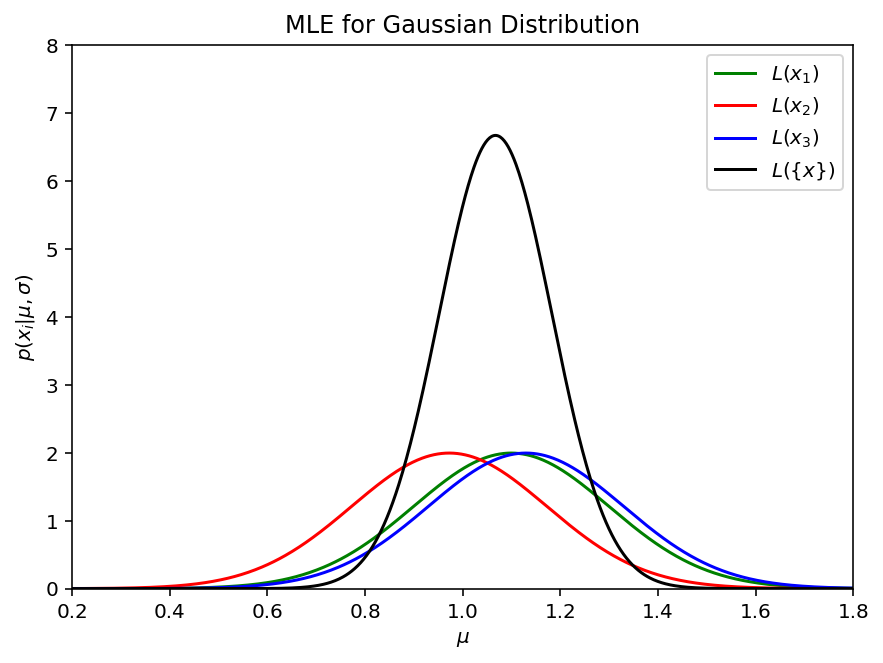

In [3]:
muGrid = np.linspace(0,2,1000)

L1 = norm(sample[0], sigma).pdf(muGrid) 
L2 = norm(sample[1], sigma).pdf(muGrid) 
L3 = norm(sample[2], sigma).pdf(muGrid) 
L = L1 * L2 * L3

# plot
fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(muGrid, L1, ls='-', c='green', 
         label=r'$L(x_1)$')
plt.plot(muGrid, L2, ls='-', c='red', 
         label=r'$L(x_2)$')
plt.plot(muGrid, L3, ls='-', c='blue', 
         label=r'$L(x_3)$')
plt.plot(muGrid, L, ls='-', c='black', 
         label=r'$L(\{x\})$')

plt.xlim(0.2, 1.8)
plt.ylim(0, 8.0)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.title('MLE for Gaussian Distribution')
plt.legend()
plt.show() 

<font color='red'>But what if I told you that mu>0.9? That's prior information! Complete and execute the following. </font>

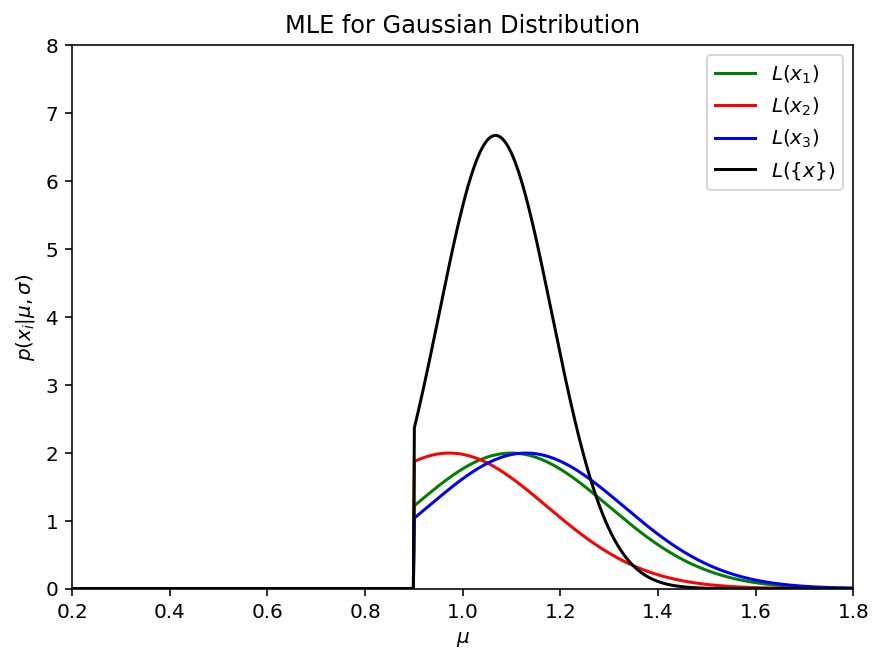

In [4]:
muMin = 0.9
L1[muGrid < muMin] = 0.
L2[muGrid < muMin] = 0.
L3[muGrid < muMin] = 0.
L = L1 * L2 * L3

# plot
fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(muGrid, L1, ls='-', c='green', label=r'$L(x_1)$')
plt.plot(muGrid, L2, ls='-', c='red', label=r'$L(x_2)$')
plt.plot(muGrid, L3, ls='-', c='blue', label=r'$L(x_3)$')
plt.plot(muGrid, L, ls='-', c='black', label=r'$L(\{x\})$')

plt.xlim(0.2, 1.8)
plt.ylim(0, 8.0)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.title('MLE for Gaussian Distribution')
plt.legend()
plt.show() 

Clearly the *maximum is unchanged in this trivial example*, but the distribution is truncated leading to very different uncertainty estimates than what one would naively get by assuming that all $\mu$ values are equally likely.

### The Essence of the Bayesian Method 

- The basic premise of the Bayesian method is that probability statements are not limited to data,  but can be made for model parameters and models themselves. 
- Inferences are made by producing  probability density functions (pdfs); most notably, **model parameters are treated as random variables**.
- These **pdfs represent our "belief spread" in what the model parameters are**. They have nothing to do with outcomes of repeated experiments (although the shape of resulting distributions can often coincide).


### Brief History 

- The **Reverend Thomas Bayes (1702–1761)** was an English amateur mathematician who wrote a manuscript 
on how to combine an initial belief with new data to arrive at an improved belief. 
- The manuscript 
was published posthumously in 1763 and gave rise to the name Bayesian statistics. 
- **Laplace** rediscovered the Bayesian approach a decade after it was originally published, and greatly clarified some principles.  
- Howevever, Bayesian statistics did not find its ways into mainstream science until well into the 20th century, and widespread usage has been hindered until the 1990s with the advent of cheap computing that can map out the Bayesian probability distributions.

![](https://upload.wikimedia.org/wikipedia/commons/d/d4/Thomas_Bayes.gif?1613667187659)

### Bayesian Statistical Inference

Up to now we have been computing the **likelihood** $p(D\,|\,M)$.  In Bayesian inference, we instead evaluate the **posterior probability** taking into account **prior** information.

Recall that Bayes' Rule is:

$$p(M\,|\,D) = \frac{p(D\,|\,M)\,p(M)}{p(D)},$$

where $D$ is for data and $M$ is for model. Or in words,

$${\rm Posterior \,\, Probability} = \frac{{\rm Likelihood}\times{\rm Prior}}{{\rm Evidence}}.$$

If we explicitly recognize prior information, $I$, and the model parameters, $\theta$, then we can write:

$$p(M,\theta \,|\,D,I) = \frac{p(D\,|\,M,\theta,I)\,p(M,\theta\,|\,I)}{p(D\,|\,I)},$$

where we will omit the explict dependence on $\theta$ by writing $M$ instead of $M,\theta$ where appropriate.  However, as the prior can be expanded to 

$$p(M,\theta\,|\,I) = p(\theta\,|\,M,I)\,p(M\,|\,I),$$

it will still appear in the term $p(\theta\,|\,M,I)$.

**NOTE** 

We don't often care about **the evidence $p(D\,|\,I)$** because it does not depend on model parameters. We usually set it to $1$ for parameter estimation. **BUT** it's at the heart of Bayesian model selection (which we'll look at in the future) since it gives us a way of ranking different model descriptions of the data.  

**The Bayesian Statistical Inference process** is then
1. formulate the likelihood, $p(D\,|\,M,\theta,I)$
2. chose a prior$^1$, $p(M,\theta\,|\,I)$, which incorporates *other information beyond the data in $D$*
3. determine the posterior pdf, $p(M,\theta \,|\,D,I)$
4. search for the model parameters that maximize $p(M,\theta \,|\,D,I)$ 
5. quantify the uncertainty of the model parameter estimates
6. perform model selection to find the most apt description of the data
 
$^1$: Note that $p(M,\theta\,|\,I) = p(\theta\,|\,M, I)\, p(M\,|\,I)$.  

Before applying this expression, we need to discuss how to choose priors.

## Bayesian priors: What Are They & How Do I Choose Them? <a class="anchor" id="two"></a>

Priors can be **informative** or **uninformative**.  As it sounds, informative priors are based on existing information (including previously obtained data, but not the data considered right now) that might be available.  Uniformative priors can be thought of as "default" priors, i.e., what your prior is when you never used
any data, e.g, a "flat" prior like $p(\theta|M,I) \propto {\rm C}$.

Detailed discussion can be found in Section 5.2 in the textbook. In general, we want our inferences to be ***data dominated*** rather than prior dominated, so we try to use ***weakly-informative priors***. There are three
main principles used to choose a prior: 


### (i) The Principle of Indifference

Essentially this means adopting a uniform prior, though you have to be a bit careful.  Saying that an asteroid is equally likely to hit anywhere on the Earth is not the same as saying that all latitudes of impact are equally likely.  

Assuming $1/6$ for a six-side die, or $1/2$ for heads and tails of a fair coin, would be an example of indifference.

### (ii) The Principle of Invariance (or Consistency)

This applies to location and scale invariance.  

**Location invariance** suggests a uniform prior, within the accepted bounds: $p(\theta|I) \propto 1/(\theta_{max}-\theta_{min})$ for $\theta_{min} \le \theta \le \theta_{max}$. 

**Scale invariance** gives us priors that look like $p(\theta|I) \propto 1/\theta$, which implies a uniform
prior for ln($\theta$), i.e. a prior that gives equal weight over many orders of magnitude. 

### (iii) The Principle of Maximum Entropy

We will not discuss it here - for more details, see Section 5.2.2 in the textbook.
 
It is often true that Bayesian analysis and traditional MLE are essentially equivalent.  
However, in some cases, considering the priors can have significant consequences, as
we will see later. 

We will skip examples of very steep priors and their consequences called in astronomy
literature **Eddington-Malmquist** and **Lutz-Kelker** biases (see Chapter 5 in the textbook
if you are interested). 

### Conjugate Priors

In special combinations of priors and likelihood functions, the resulting posterior probability distribution is from the same function family as the prior. These priors are called **conjugate priors** and give a convenient way for generalizing computations. There are exhaustive tables [here](https://www.wikiwand.com/en/Conjugate_prior#/Table_of_conjugate_distributions). 

**EXAMPLE**

If the likelihood is Gaussian and the prior function is Gaussian, then so too is the posterior distribution! So the conjugate prior for a Gaussian likelihood is a Gaussian.

For data drawn from a Gaussian likelihood equal to $\mathcal{N}(\bar{x},s)$ (where $\bar{x}$ is the sample mean and $s$ is the sample standard deviation), with a prior on the underlying parameters $\mathcal{N}(\mu_p,\sigma_p)$, the posterior is $\mathcal{N}(\mu^0,\sigma^0)$, where

$$\mu^0 = \frac{\mu_p/\sigma_p^2 + \bar{x}/s^2}{1/\sigma_p^2 + 1/s^2},\quad \sigma^0 = \left( 1/\sigma_p^2 + 1/s^2 \right)^{-1/2} $$


### Hierarchical Bayes

You may hear of ***hierarchical Bayesian modeling*** a great deal these days. It's become sort of a buzz-term for people wanting to sound fancy, and [I am not immune to this](https://arxiv.org/abs/1806.08365). 

But there's nothing terribly fancy about it. Essentially, we will look at employing prior distributions today that have fixed shapes (e.g. Gaussian distributions centered around fixed values with fixed widths). 

But in hierarchical Bayesian modeling, the parameters of the prior distribution (called ***hyperparameters***) become part of the search! The data informs not only properties of individual events but also the shape of the prior. Those prior parameters then get their own priors, called ***hyperpriors***. 

**The whole analysis is then hierarchical, corresponding to multiple layers of inference.** 

For example, we have lots of [exoplanet discoveries](https://exoplanets.nasa.gov/discovery/discoveries-dashboard/). 
- Each of those discoveries started with some lightcurve data, where we fit a likelihood model to that data to deduce parameters of the system. 
- The prior on those parameters was likely weakly informative. 
- ***BUT*** the prior is really describing the underlying distribution of orbital periods, eccentricies, etc. So we can use our data not only to inform the properties of each system, but to map out the demographic distribution of exoplanet periods and more! Pretty cool! (e.g. https://arxiv.org/abs/1406.3020)

## Bayesian credible regions <a class="anchor" id="three"></a>

In the **frequentist paradigm**, the meaning of the *confidence interval* $\mu_0 \pm \sigma_{\mu}$ is 
the interval that would contain the true $\mu$ (from which the data were drawn) in $68\%$ (or $X\%$) cases
of a large number of *imaginary repeated experiments* (each with a different N values of $\{x_i\}$). 

However, the meaning of the so-called ***Bayesian credible region*** is *fundamentally different*: it is the interval that contains the true $\mu$ with a probability of $68\%$ (or $X\%$), given the given dataset (our dear one and only dataset - there are no imaginary experiments in Bayesian paradigm). This credible region is the 
relevant quantity in the context of scientific measurements. 

There are several important features of a Bayesian posterior distribution:
- They represent how well we believe a parameter is constrained within a certain range
- We often quote the posterior maximum, or the **Maximum A Posteriori (MAP)**
- We also often the posterior marginalized mean, $\bar{\theta} = \int \theta\, p(\theta|D)d\theta$
- ***The credible regions are not unique***. We can compute them in two different ways (visualized below)
    1. We can integrate downwards from the MAP to enclose $X\%$ ("highest probability density interval"), or
    2. We can integrate inwards from each tail by $X/2\%$ ("equal-tailed interval")

<img src="figures/fig_credibleregion.png" alt="" style="width: 500px;"/>

## Simple parameter estimation examples <a class="anchor" id="four"></a>

### The first exercise in all Bayesian lectures: the coin flip 

Imagine you met a gambler who wanted you to **bet on whether the coin would come up heads or tails**. You watch the gambler work as a number of other people guess (as the coin is flipped). 

<font color='red'>Calculate and plot the Bayesian posterior of the probabilty of drawing a head as a function of watching [5, 50, 500] coin flips. Talk and work in your breakout rooms to do this. Share screen and co-code if necessary.</font>

Remember the probability of getting $h$ heads in $n$ coin flips is given by the binomial probability distribution
>$P(h|\theta) = {n\choose h} \theta^h (1-\theta)^{(n-h)}$

with $\theta$ the probability of a head.

You will need to

* formulate the likelihood, $p(D\,|\,M,\theta,I)$
* choose a prior$^1$, 
* plot the posterior pdf, $p(M,\theta \,|\,D,I)$
 
 
 $^1$: Start with just a uniform prior on $\theta$ that is constant.

In [5]:
# Execute this cell for some data to use
data = np.array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

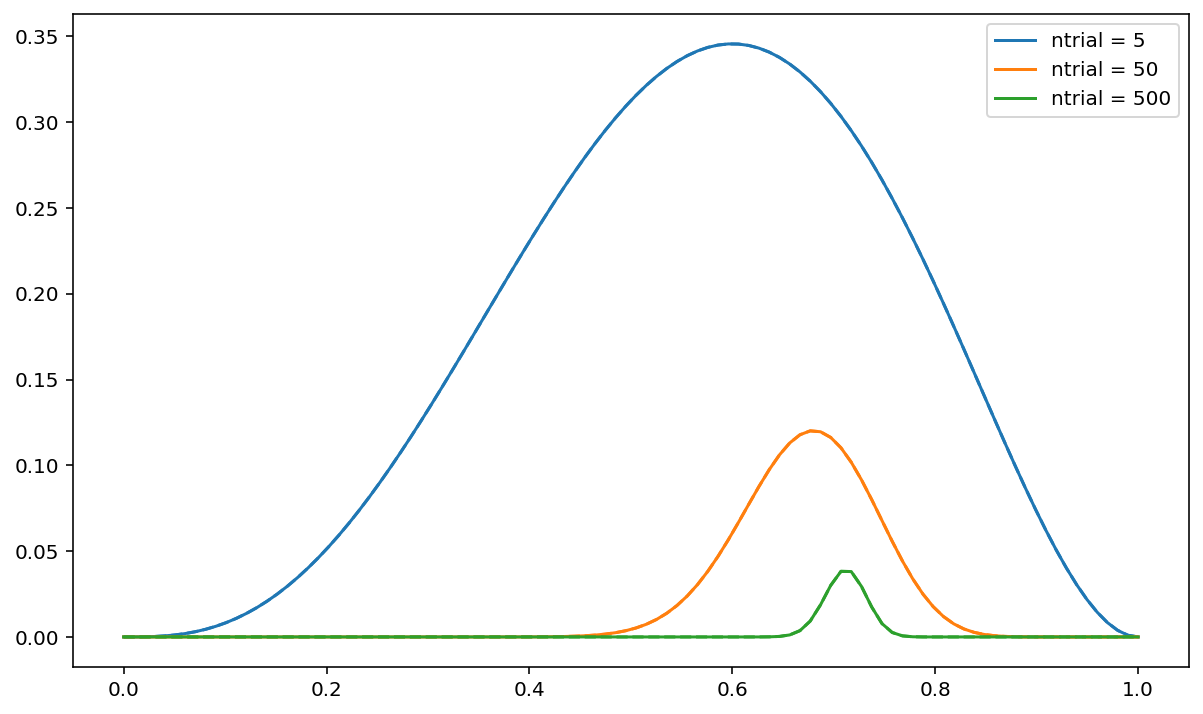

In [76]:
# Modify and execute this cell.
def p_nheads(n, h, theta):
    # code the binomial distribution here
    return (np.math.factorial(n)/(np.math.factorial(h)*np.math.factorial(n-h))) * theta**h * (1-theta)**(n-h)

# likelihood
def L(data, ntrials, theta):
    nheads = data[:ntrials].sum()
    return p_nheads(ntrials, nheads, theta)

# prior (ignore loc and scale until the beta prior)
def prior(theta, loc=3.0, scale=3.0):
    # put a prior distribution here
    return 1.

fig, ax = plt.subplots(figsize=(10,6))

probs = []
# define the number of trials
n_trials = [5, 50, 500]
theta = np.linspace(0, 1, 100)
i = 0
for nt in n_trials:
    prob = L(data, nt, theta) * prior(theta)
    # posterior plot
    ax.plot(theta, prob, 
            label=r'ntrial = '+str(nt), color = 'C'+str(i))
    # likelihood plot
    ax.plot(theta, L(data, nt, theta), ls='--', color = 'C'+str(i))
    # colour rotator
    i+=1

#plt.yscale('log')
plt.legend();

What if I used a $\beta$ function for the prior?

$P(\alpha, \beta, \theta) = \theta^{\alpha-1} (1-\theta)^{(\beta-1)}$

Modify your code above to use a $\beta$ function prior on $\theta$ with $a=3$ and $b=3$. You can code this directly or grab from `scipy.stats`.

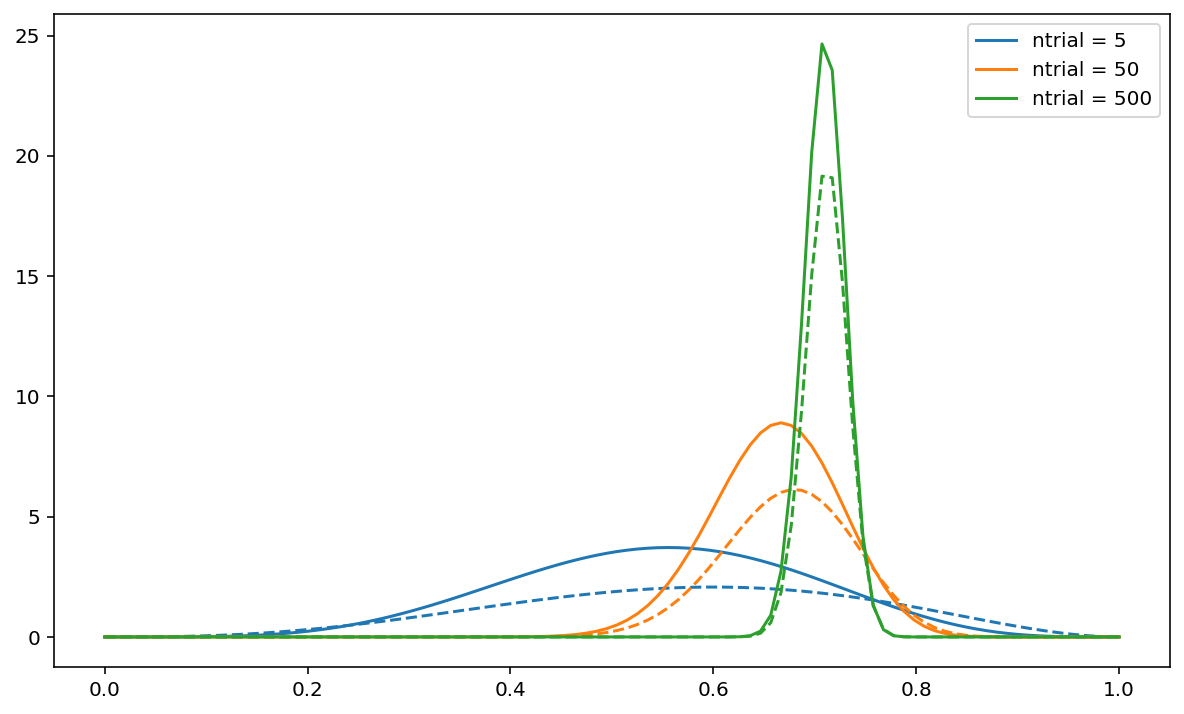

In [69]:
def p_nheads(n, h, theta):
    # code the binomial distribution here
    return (n+1)*(np.math.factorial(n)/(np.math.factorial(h)*np.math.factorial(n-h))) * theta**h * (1-theta)**(n-h)

# prior (ignore loc and scale until the beta prior)
def prior(theta, loc=3.0, scale=3.0):
    # put a prior distribution here
    return scipy.stats.beta(loc, scale).pdf(theta)

fig, ax = plt.subplots(figsize=(10,6))

probs = []
# define the number of trials
n_trials = [5, 50, 500]
theta = np.linspace(0, 1, 100)
i = 0
for nt in n_trials:
    prob = L(data, nt, theta) * prior(theta)
    # posterior plot
    ax.plot(theta, prob, 
            label=r'ntrial = '+str(nt), color = 'C'+str(i))
    # likelihood plot
    ax.plot(theta, L(data, nt, theta), ls='--', color = 'C'+str(i))
    # colour rotator
    i+=1
    
plt.legend();

### Nuisance parameters and marginalization

#### Heteroscedastic Gaussian as an example


Consider the case of measuring a rod.  We want to know the posterior pdf for the length of the rod, $p(M,\theta|D,I) \equiv p(\mu|\{x_i\},\{\sigma_i\},I)$.

For the likelihood we have

$$L = p(\{x_i\}|\mu,I) = \prod_{i=1}^N \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}
{2\sigma_i^2}\right).$$

---

**In the Bayesian case, we also need a prior.**  We'll adopt a *flat uniform distribution* given by

$$p(\mu|I) = C, \; {\rm for} \; \mu_{\rm min} < \mu < \mu_{\rm max},$$

where $C = \frac{1}{\mu_{\rm max} - \mu_{\rm min}}$ between the min and max and is $0$ otherwise.

The log of the posterior pdf is then

$$\ln L = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma_i^2}.$$

This is exactly the same as we saw before, except that the value of the constant is different.  Since the constant doesn't come into play, we get the same result as before:
 
$$\mu^0 = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)},$$

with uncertainty

$$\sigma_{\mu} = \left( \sum_{i=1}^N \frac{1}{\sigma_i^2}\right)^{-1/2}.$$
 
We get the same result because we used a flat prior. If the case were homoscedastic instead of heteroscedastic, we obviously would get the result from our first example.

---

Now let's consider the case where **$\sigma$ is not known**, but rather it needs to be determined from the data, too.

In this case, the posterior pdf that we seek is not $p(\mu|\{x_i\},\{\sigma_i\},I)$, but rather the joint $2$D pdf $p(\mu,\sigma|\{x_i\},I)$.

As before we have

$$L = p(\{x_i\}|\mu,\sigma,I) = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right),$$

except that now $\sigma$ is uknown.

---

Our Bayesian prior is *now 2D instead of 1D* and we'll adopt 

$$p(\mu,\sigma|I) \propto \frac{1}{\sigma},\; {\rm for} \; \mu_{\rm min} < \mu < \mu_{\rm max} \; {\rm and} \; \sigma_{\rm min} < \sigma < \sigma_{\rm max}.$$

With proper normalization, we have

$$p(\{x_i\}|\mu,\sigma,I)p(\mu,\sigma|I) = C\frac{1}{\sigma^{(N+1)}}\prod_{i=1}^N \exp\left( \frac{-(x_i-\mu)^2}{2\sigma^2}  \right),$$

where

$$C = (2\pi)^{-N/2}(\mu_{\rm max}-\mu_{\rm min})^{-1} \left[\ln \left( \frac{\sigma_{\rm max}}{\sigma_{\rm min}}\right) \right]^{-1}.$$

The log of the posterior pdf is

$$\ln[p(\mu,\sigma|\{x_i\},I)] = {\rm constant} - (N+1)\ln\sigma - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma^2}.$$

Since we are assuming a Gaussian distribution, the mean, $\overline{x}$, and the variance, $V (=s^2)$, completely characterize the distribution. So we can write this expression in terms of those variables instead of $x_i$.  Skipping over the math details (see textbook $\S$5.6.1), we find

$$\ln[p(\mu,\sigma|\{x_i\},I)] = {\rm constant} - (N+1)\ln\sigma - \frac{N}{2\sigma^2}\left( (\overline{x}-\mu)^2 + V  \right).$$

Note that this expression only contains the 2 parameters that we are trying to determine: $(\mu,\sigma)$ and 3 values that we can determine directly from the data: $(N,\overline{x},V)$. A side note: these three data-based values fully encapsulate our dataset and are called *sufficient statistics*.

<font color='red'>Execute the next cell to visualize the posterior pdf for the case of $(N,\overline{x},V)=(10,1,4)$. Try playing around with and changing the values of $(N,\overline{x},V)$.</font> 

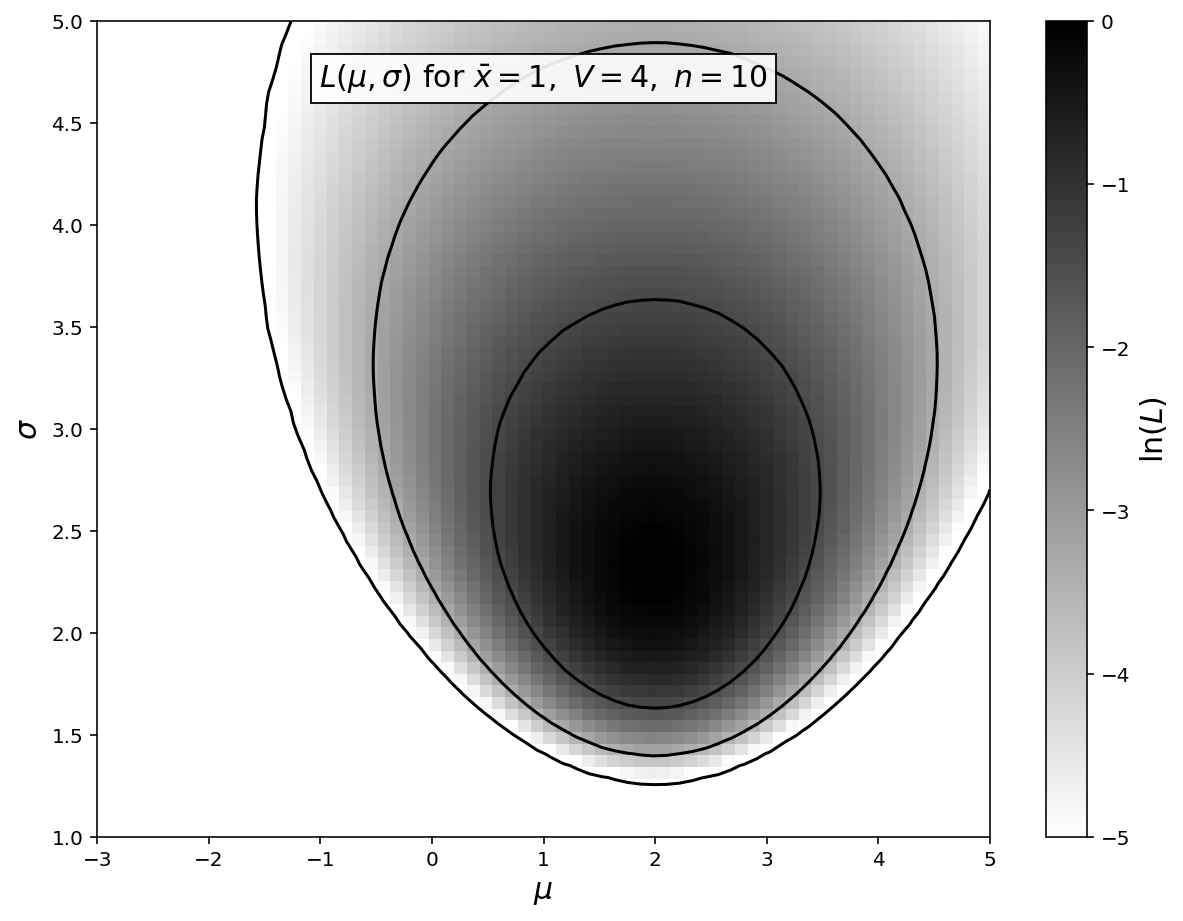

In [34]:
# %load code/fig_likelihood_gaussian.py
"""
Log-likelihood for Gaussian Distribution
----------------------------------------
Figure5.4
An illustration of the logarithm of the posterior probability density
function for :math:`\mu` and :math:`\sigma`, :math:`L_p(\mu,\sigma)`
(see eq. 5.58) for data drawn from a Gaussian distribution and N = 10, x = 1,
and V = 4. The maximum of :math:`L_p` is renormalized to 0, and color coded as
shown in the legend. The maximum value of :math:`L_p` is at :math:`\mu_0 = 1.0`
and :math:`\sigma_0 = 1.8`. The contours enclose the regions that contain
0.683, 0.955, and 0.997 of the cumulative (integrated) posterior probability.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from astroML.plotting.mcmc import convert_to_stdev

def gauss_logL(xbar, V, n, sigma, mu):
    """Equation 5.57: gaussian likelihood"""
    return (-(n + 1) * np.log(sigma)
            - 0.5 * n * ((xbar - mu) ** 2 + V) / sigma ** 2)

#------------------------------------------------------------
# Define the grid and compute logL
sigma = np.linspace(1, 5, 70)
mu = np.linspace(-3, 5, 70)
xbar = 2
V = 6
n = 8

logL = gauss_logL(xbar, V, n, sigma[:, np.newaxis], mu)
logL -= logL.max()

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 7.5))
plt.imshow(logL, origin='lower',
           extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
           cmap=plt.cm.binary,
           aspect='auto')
plt.colorbar().set_label(r'$\ln(L)$', fontsize=15)
plt.clim(-5, 0)

plt.contour(mu, sigma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='k')

plt.text(0.5, 0.93, r'$L(\mu,\sigma)\ \mathrm{for}\ \bar{x}=1,\ V=4,\ n=10$',
         bbox=dict(ec='k', fc='w', alpha=0.9),
         ha='center', va='center', 
         fontsize=15, transform=plt.gca().transAxes)

plt.xlabel(r'$\mu$', fontsize=15)
plt.ylabel(r'$\sigma$', fontsize=15)

plt.show()

The plot from the previous cell is described by 

$$\ln[p(\mu,\sigma|\{x_i\},I)] = {\rm constant} - (N+1)\ln\sigma - \frac{N}{2\sigma^2}\left( (\overline{x}-\mu)^2 + V  \right).$$


**What if we don't care that much about $\sigma$?** e.g. it may simply represent how good our measuring apparatus is - what we might get a Nobel prize for is $\mu$. 
- Therefore, what we want is $p(\mu|\{x_i\},I)$, rather than $p(\mu,\sigma|\{x_i\},I)$. 
- We can get the former from the latter by the **marginalization over $\sigma$**, which means integration of $p(\mu,\sigma|\{x_i\},I)$ over $\sigma$: 

$$ p(\mu\,|\,\{x_i\},I) = \int_0^\infty p(\mu,\sigma|\{x_i\},I) d\sigma$$
and thus (using the substitution $t$ = 1/$\sigma$ and integration by parts)

$$ p(\mu\,|\,\{x_i\},I) \propto \left(1 + \frac{(\overline{x}-\mu)^2}{V} \right)^{-N/2}. $$

It is easy to show that this result corresponds to *Student’s $t$ distribution* (Google it!) with 
$k = N-1$ degrees of freedom for the variable $t = (x-\mu)/(s/\sqrt{N})$, where $s$ is the sample 
standard deviation. As we've seen the Student’s $t$ distribution is symmetric and bell shaped, but with heavier 
tails than  a Gaussian distribution.  

**Hold on!** This is not a Gaussian distribution promised by the Central Limit Theorem!!! 

That's fine! The CLT promised a Gaussian only for large $N$. Indeed, the above expression
(Student's $t$ distribution) morphs into a Gaussian for large $N$ - let's check!

<font color='red'>Let's see how Student's t distribution morphs into Gaussian distribution. let's first choose mean x and variance as in the previous example. </font>

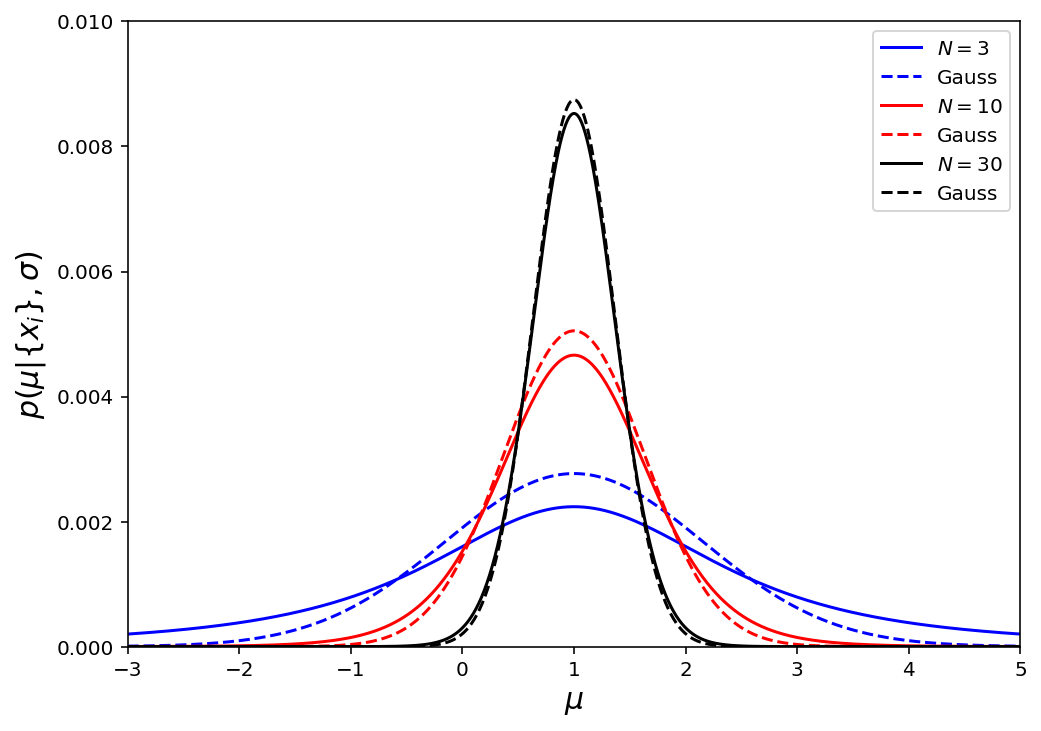

In [35]:
### let's see how Student's t distribution morphs into Gaussian distribution
# let's first choose mean x and variance as in the previous example
mu = np.linspace(-3, 5, 1000)
xbar = 1.0
V = 4.0

# and now let's generate p(mu) for N=3, 10 and 20
def compute_pmu(mu, xbar, V, N):
    p = (1 + (xbar - mu) ** 2 / V) ** (-0.5 * N)
    return p / np.sum(p)
#
N1 = 3
pmu1 = compute_pmu(mu,xbar,V,N1)
G1 = norm(xbar, np.sqrt(V/N1)).pdf(mu) 
G1norm = G1 / np.sum(G1)

N2 = 10
pmu2 = compute_pmu(mu,xbar,V,N2)
G2 = norm(xbar, np.sqrt(V/N2)).pdf(mu) 
G2norm = G2 / np.sum(G2)

N3 = 30
pmu3 = compute_pmu(mu,xbar,V,N3)
G3 = norm(xbar, np.sqrt(V/N3)).pdf(mu) 
G3norm = G3 / np.sum(G3)
 
## plot
fig, ax = plt.subplots(figsize=(8, 5.75))
plt.plot(mu, pmu1, ls='-', c='blue', label=r'$N=3$')
plt.plot(mu, G1norm, ls='--', c='blue', label=r'Gauss')
plt.plot(mu, pmu2, ls='-', c='red', label=r'$N=10$')
plt.plot(mu, G2norm, ls='--', c='red', label=r'Gauss')
plt.plot(mu, pmu3, ls='-', c='black', label=r'$N=30$')
plt.plot(mu, G3norm, ls='--', c='black', label=r'Gauss')

plt.xlim(-3, 5)
plt.ylim(0, 0.01)
plt.xlabel('$\mu$', fontsize=15)
plt.ylabel(r'$p(\mu | \{x_i\},\sigma)$', fontsize=15)
plt.legend()
plt.show() 

The top panels of the figure below (textbook figure 5.5, for the code see 
[astroML website](http://www.astroml.org/book_figures/chapter5/fig_posterior_gaussian.html)) show marginal distributions $p(\mu)$ and $p(\sigma)$.  The solid line is 
analytic Bayesian result with uninformative prior and the dotted line is the result for a uniform prior (note 
that there is not that much difference).  The dashed line is the MLE result, which is quite different.  The bottom panels show the cumulative distributions.

![Ivezic, Figure 5.5](http://www.astroml.org/_images/fig_posterior_gaussian_1.png)
 

- The main result here is that **for smallish N ($<$10 or so), $p(\mu)$ is not Gaussian!** 
- The code above can be used to compute $p(\mu)$ for arbitrary values of N, $\overline{x}$ and V.
- For large N, Gaussian is a good approximation of $p(\mu)$. 